In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/processed/dataset_limpio.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconocido,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconocido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconocido,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


**Fase 1: Preguntar**

1. ¿Qué porcentaje de contenido es películas vs series?
2. ¿Cómo ha cambiado el rating (clasificación por edad) con el tiempo?
3. ¿Cuánto dura en promedio una película/serie? ¿Hay diferencias por género?
4. ¿Cuánto dura en promedio una película/serie? ¿Hay diferencias por género?

## 1. ¿Qué porcentaje de contenido es películas vs series?

In [8]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [19]:
pcts = df["type"].value_counts(normalize=True) * 100

print(f"Porcentajes de tipos de contenido:")
print(f"Películas: {pcts['Movie']:.2f}%")
print(f"Series: {pcts['TV Show']:.2f}%")

Porcentajes de tipos de contenido:
Películas: 69.62%
Series: 30.38%


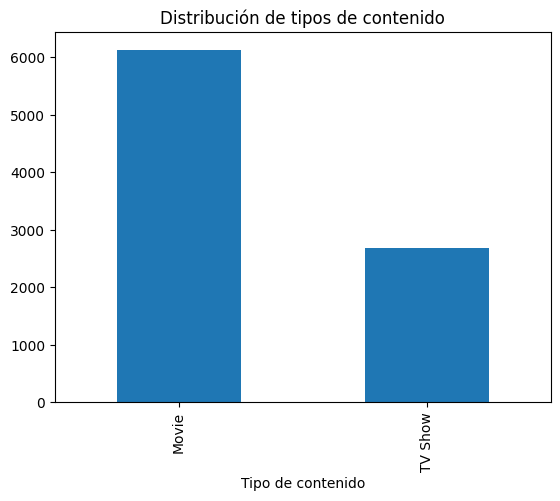

In [18]:
df["type"].value_counts().plot(kind="bar")
plt.title("Distribución de tipos de contenido")
plt.xlabel("Tipo de contenido")
plt.show()

## ¿Qué porcentaje de contenido es películas vs series?

> 

## ¿Cómo ha cambiado el rating (clasificación por edad) con el tiempo?

In [20]:
df["rating"].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [21]:
# Agrupar por año y rating
tabla = pd.crosstab(df['release_year'], df['rating'])
print(tabla.head() )

rating        66 min  74 min  84 min  G  NC-17  NR  PG  PG-13  R  TV-14  TV-G  \
release_year                                                                    
1925               0       0       0  0      0   0   0      0  0      1     0   
1942               0       0       0  0      0   0   0      0  0      2     0   
1943               0       0       0  0      0   0   0      0  0      0     0   
1944               0       0       0  0      0   0   0      0  0      2     0   
1945               0       0       0  0      0   0   0      0  0      2     0   

rating        TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
release_year                                           
1925              0      0     0      0         0   0  
1942              0      0     0      0         0   0  
1943              0      3     0      0         0   0  
1944              0      1     0      0         0   0  
1945              2      0     0      0         0   0  


In [22]:
df["rating"].unique()


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
# Detectar filas donde rating contiene minutos
mask = df["rating"].str.contains("min", na=False)

# Pasar ese valor a duration
df.loc[mask, "duration"] = df.loc[mask, "rating"]

# Poner como nulo el rating incorrecto
df.loc[mask, "rating"] = np.nan

In [28]:
#Luego rellenar esos nulos correctamente:
df["rating"] = df["rating"].fillna("NR")   # Not Rated


In [26]:
tabla = pd.crosstab(df["release_year"], df["rating"])
tabla

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1942,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,3,0,0,0,0
1944,0,0,0,0,0,0,2,0,0,1,0,0,0,0
1945,0,0,0,0,0,0,2,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1,0,3,15,32,73,251,26,452,111,31,37,0,0
2018,2,1,1,31,30,52,268,26,549,105,41,40,1,0
2019,1,0,0,12,19,39,252,23,500,98,50,36,0,0


In [29]:
df["rating"] = df["rating"].fillna("NR") 

In [30]:
tabla = pd.crosstab(df["release_year"], df["rating"])
print(tabla.head() )

rating        G  NC-17  NR  PG  PG-13  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
release_year                                                                
1925          0      0   0   0      0  0      1     0      0      0     0   
1942          0      0   0   0      0  0      2     0      0      0     0   
1943          0      0   0   0      0  0      0     0      0      3     0   
1944          0      0   0   0      0  0      2     0      0      1     0   
1945          0      0   0   0      0  0      2     0      2      0     0   

rating        TV-Y7  TV-Y7-FV  UR  
release_year                       
1925              0         0   0  
1942              0         0   0  
1943              0         0   0  
1944              0         0   0  
1945              0         0   0  


In [35]:
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

tabla_pct

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
1925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0
1944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.666667,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.0
1945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0.096899,0.000000,0.290698,1.453488,3.100775,7.073643,24.321705,2.519380,43.798450,10.755814,3.003876,3.585271,0.000000,0.0
2018,0.174368,0.087184,0.087184,2.702703,2.615519,4.533566,23.365301,2.266783,47.863993,9.154316,3.574542,3.487358,0.087184,0.0
2019,0.097087,0.000000,0.000000,1.165049,1.844660,3.786408,24.466019,2.233010,48.543689,9.514563,4.854369,3.495146,0.000000,0.0


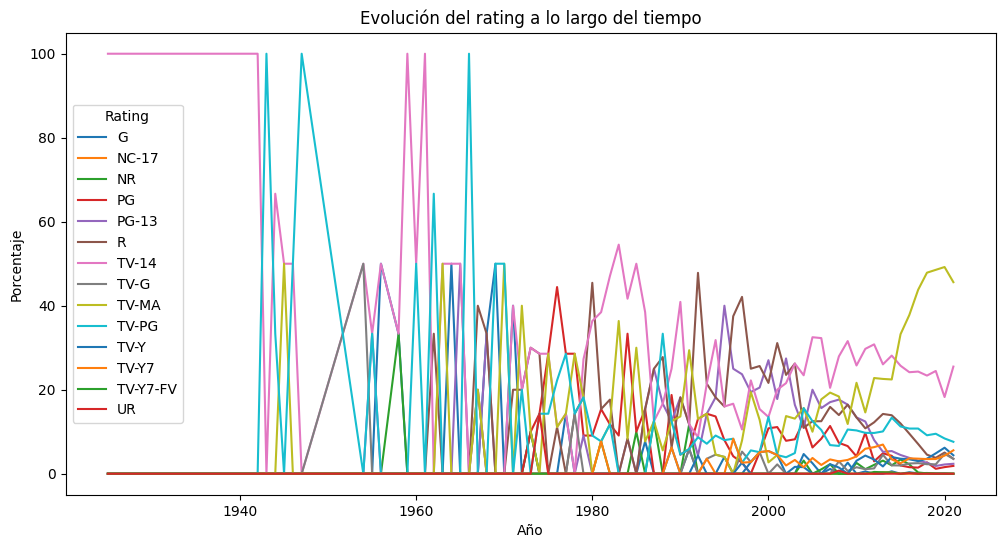

In [33]:
tabla_pct.plot(figsize=(12,6))

plt.title("Evolución del rating a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.legend(title="Rating")
plt.show()


In [36]:
def categoria_rating(r):
    if r in ["TV-MA", "R"]:
        return "Adultos"
    elif r in ["TV-14", "PG-13"]:
        return "Adolescentes"
    else:
        return "Niños"

df["categoria_rating"] = df["rating"].apply(categoria_rating)


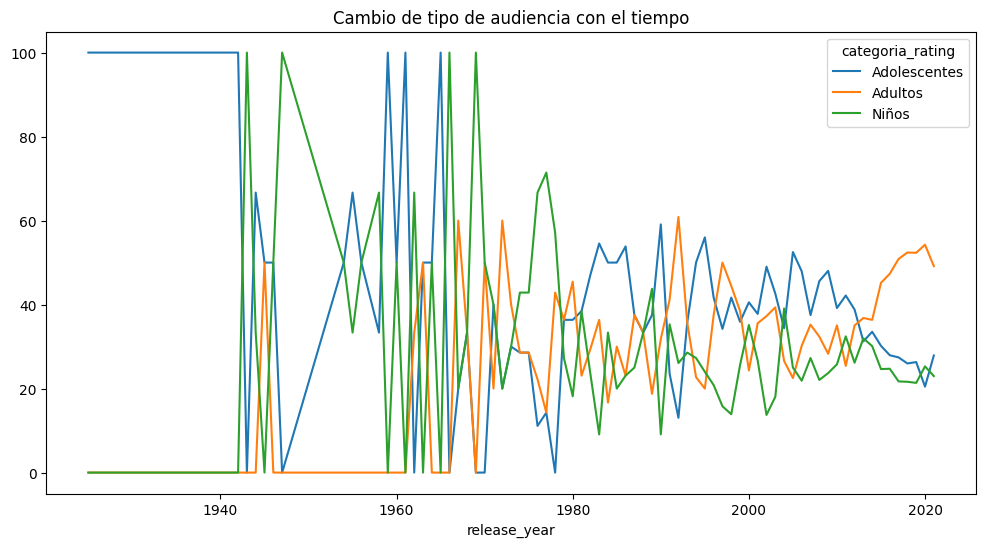

In [37]:
tabla2 = pd.crosstab(df["release_year"], df["categoria_rating"])
tabla2_pct = tabla2.div(tabla2.sum(axis=1), axis=0) * 100

tabla2_pct.plot(figsize=(12,6))
plt.title("Cambio de tipo de audiencia con el tiempo")
plt.show()


## ¿Cuánto dura en promedio una película/serie? ¿Hay diferencias por género?

In [ ]:
df["duration_num"] = df["duration"].str.extract("(\d+)").astype(float)